In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() #setting the default seaborn style for our plots
import pandas as pd
from pandas import DataFrame
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [2]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.isna().apply(pd.value_counts)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
False,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


In [5]:
df.describe()  
# Statistical Summary

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


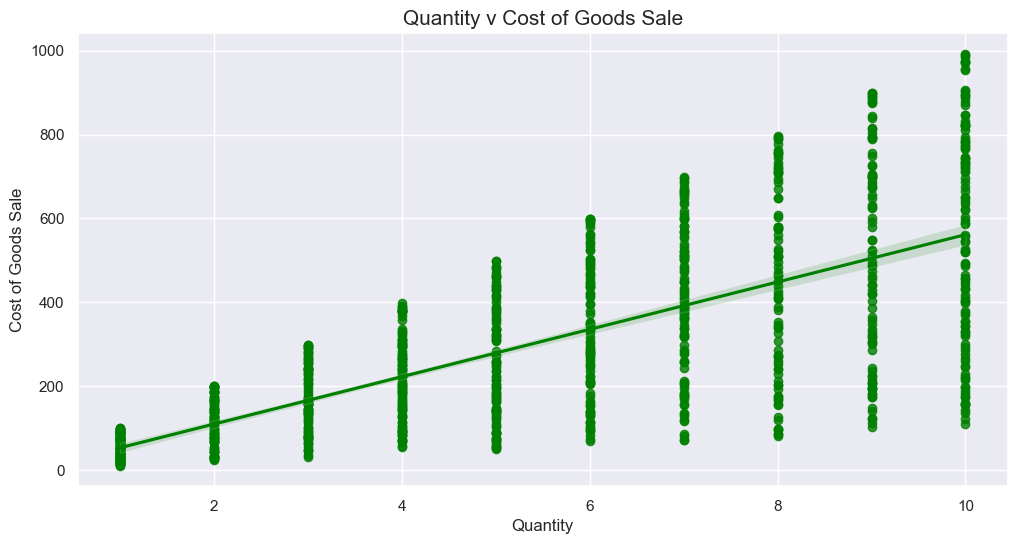

In [7]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Quantity',y='cogs',data=df,color='green')
plt.xlabel('Quantity')
plt.ylabel('Cost of Goods Sale')
plt.title('Quantity v Cost of Goods Sale',fontsize=15)
plt.show()

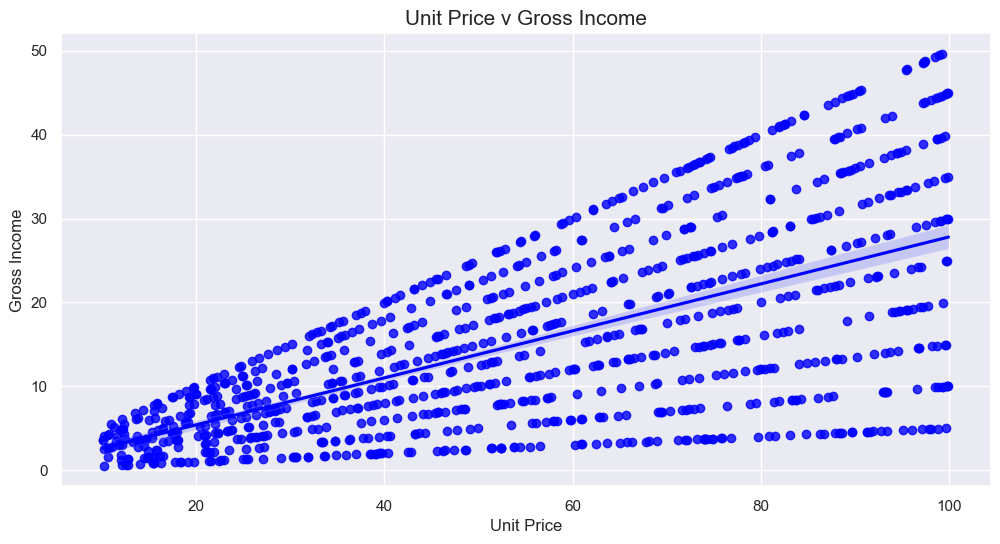

In [8]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Unit price',y='gross income',data=df,color='blue')
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')
plt.title('Unit Price v Gross Income',fontsize=15)
plt.show()

C:\Users\ahmmad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


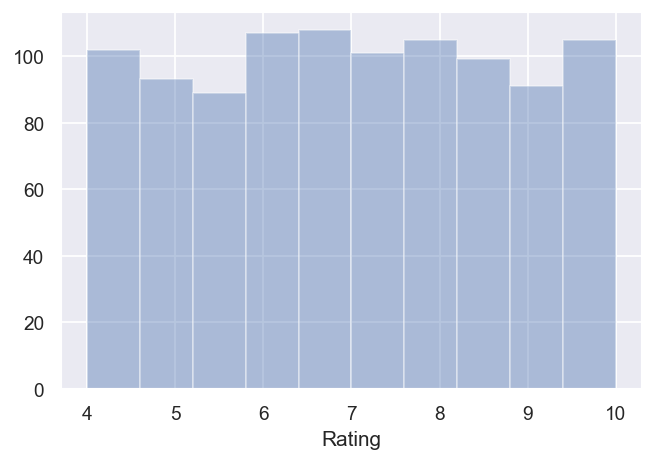

In [10]:
plt.figure(dpi=125) 
sns.distplot(df['Rating'],kde=False)
plt.show()
#this bis the distribution of the ratings

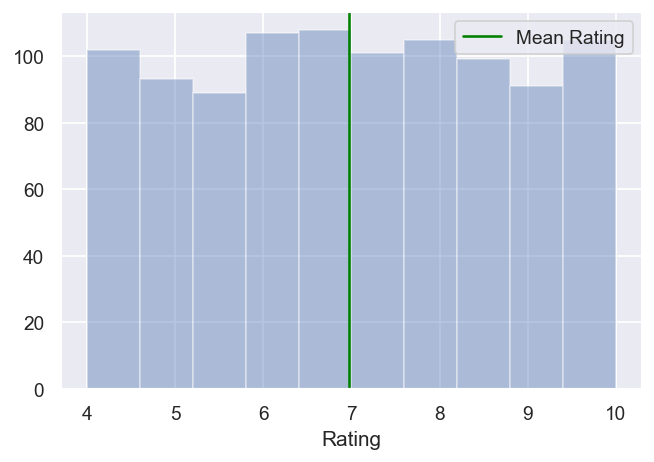

In [12]:
plt.figure(dpi=125)
sns.distplot(df['Rating'],kde=False)
plt.axvline(x=np.mean(df['Rating']),c='green',label='Mean Rating')
plt.legend()
plt.show()
#mean of ratings

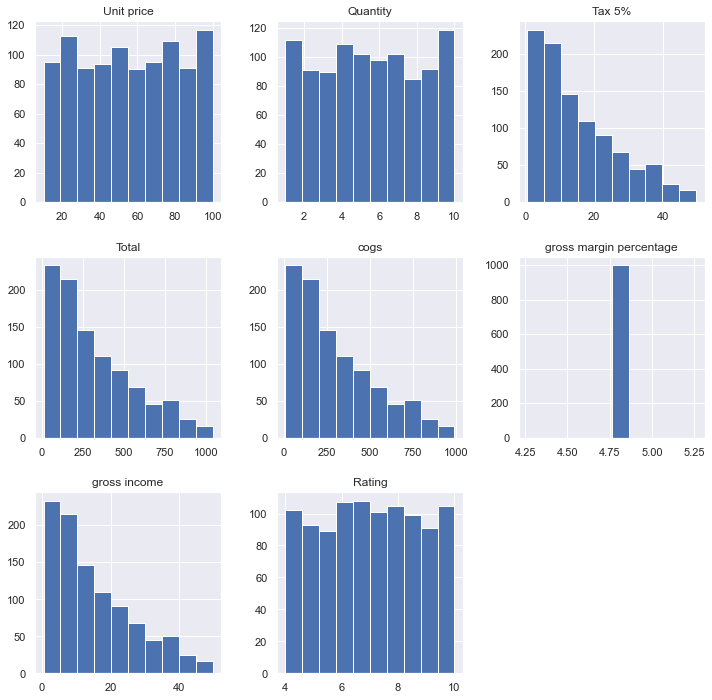

In [14]:
df.hist(figsize=(12,12))
plt.show()

C:\Users\ahmmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Branch A - 340
Branch B - 328
Branch C - 332


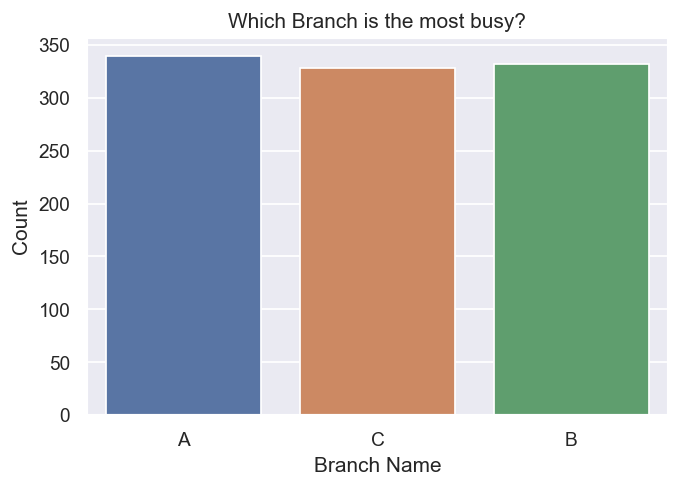

In [15]:
plt.figure(dpi=125)
sns.countplot(df['Branch'])
plt.xlabel('Branch Name')
plt.ylabel('Count')
plt.title('Which Branch is the most busy?')
A,B,C =df.Branch.value_counts()

print('Branch A -',A)
print('Branch B -',C)
print('Branch C -',B)
      

plt.show()
#all branches has almost the same count

C:\Users\ahmmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


E-wallet - 345
Cash - 344
Credit Card - 311


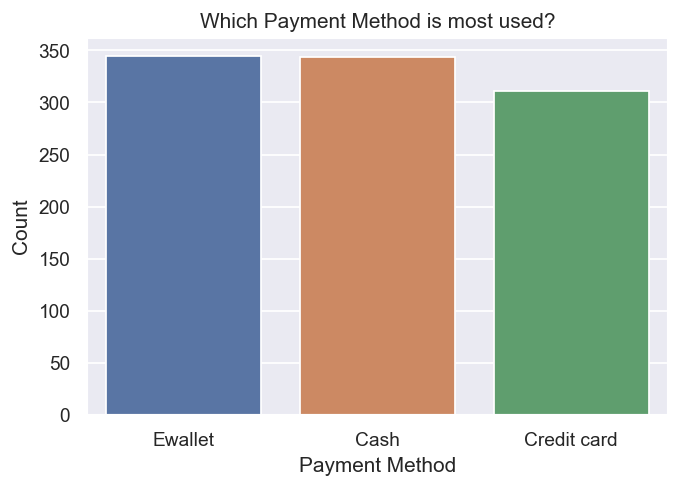

In [16]:
plt.figure(dpi=125)
sns.countplot(df['Payment'])
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Which Payment Method is most used?')
A,B,C =df.Payment.value_counts()

print('E-wallet -',A)
print('Cash -',B)
print('Credit Card -',C)
plt.show()
#ewallet and cash is the most used method

C:\Users\ahmmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Yangon - 340
Naypyitow - 328
Mandalay - 332


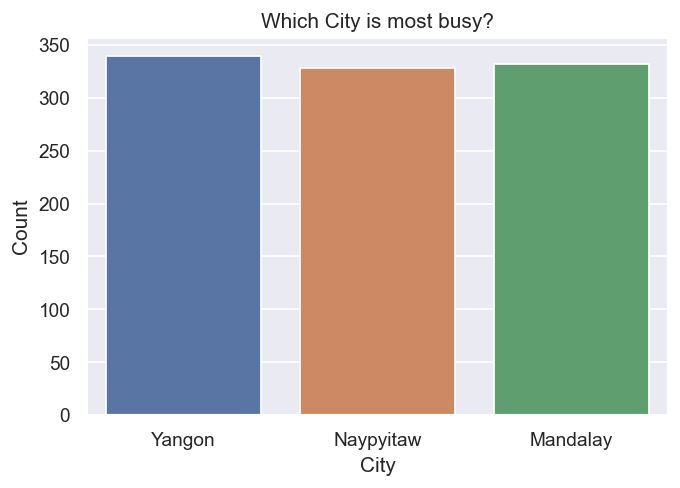

In [17]:
plt.figure(dpi=125)
sns.countplot(df['City'])
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Which City is most busy?')
A,B,C =df.City.value_counts()

print('Yangon -',A)
print('Naypyitow -',C)
print('Mandalay -',B)
plt.show()
#all most all cities is busy

C:\Users\ahmmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Male- 499
Female - 501


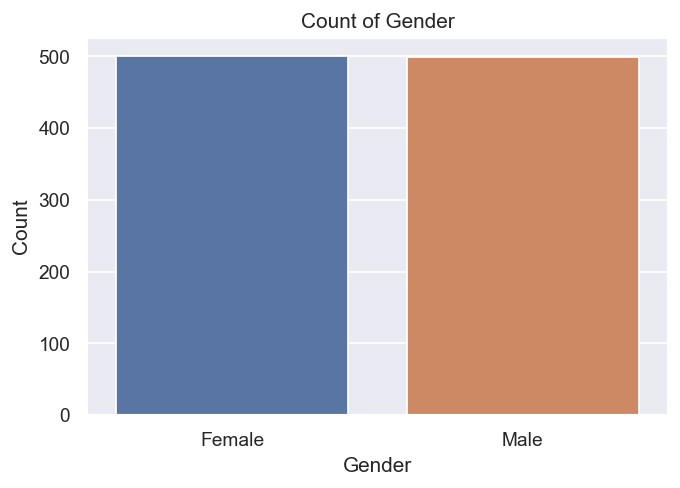

In [19]:
plt.figure(dpi=125)
sns.countplot(df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')
A,B =df.Gender.value_counts()

print('Male-',B)
print('Female -',A)

plt.show()

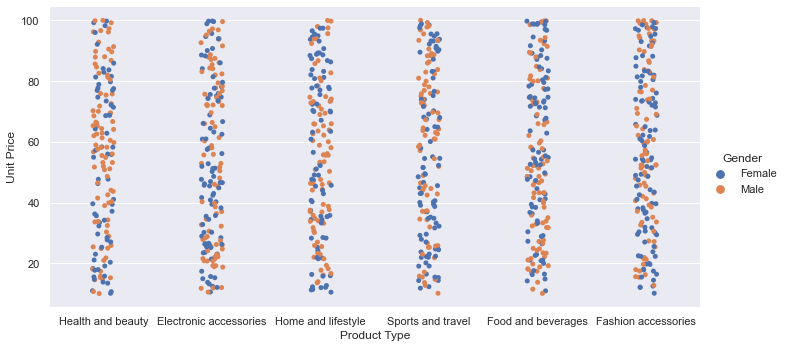

In [20]:
sns.catplot(x='Product line',y='Unit price',hue='Gender',data=df,aspect=2)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()
#distribution of products buyed by genders

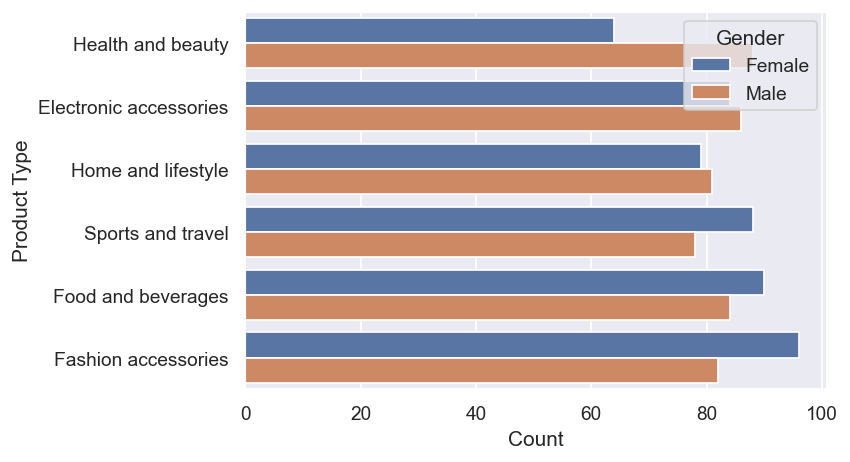

In [22]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Gender", data = df) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()
#another plot for products and genders

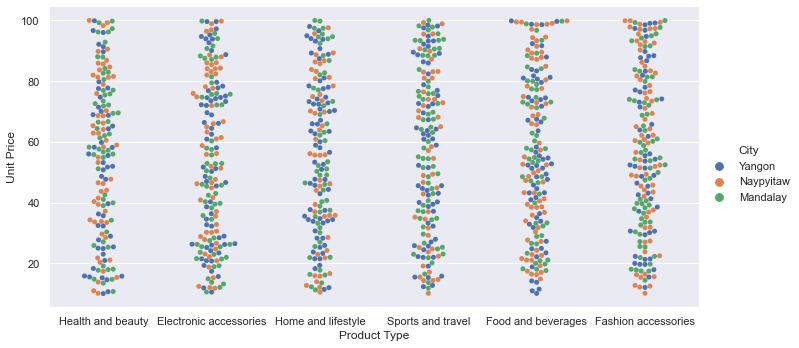

In [23]:
sns.catplot(x='Product line',y='Unit price',hue='City',kind='swarm',data=df,aspect=2)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()
#this shows the most used products in every city

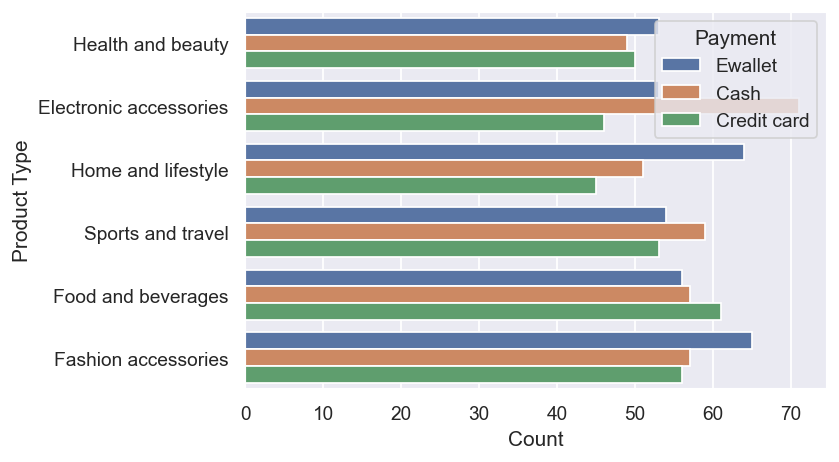

In [24]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Payment", data = df) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()
#this shows the method that people use to pay for the products

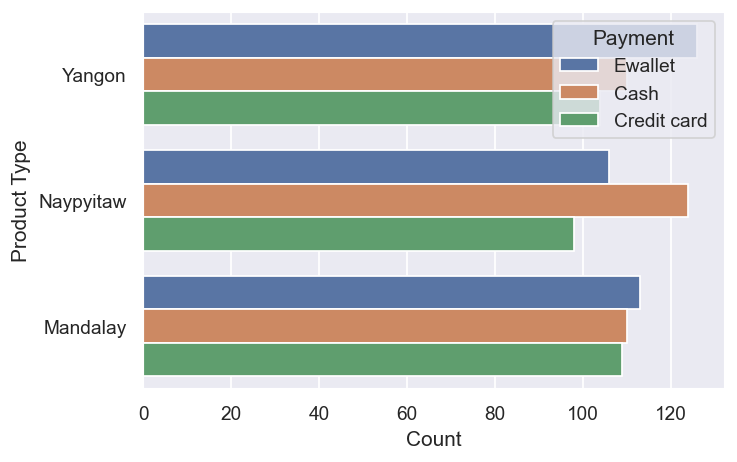

In [25]:
plt.figure(dpi=125)
sns.countplot(y ='City', hue = "Payment", data = df) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()
#this shows the most commonly used payment method in cities